In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/Spam Email Classifier/email.csv")

# Data Preprocessing

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
df['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [6]:
df.index[df['Category'] == '{"mode":"full"'].tolist()

[5572]

In [7]:
df = df.drop(df[df['Category'] == '{"mode":"full"'].index)

In [8]:
df.isnull().sum()

,0
Category,0
Message,0


In [9]:
# So no null values are found in the dataset.

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(5157, 2)

In [12]:
df.reset_index(inplace = True)

# Text Preprocessing

In [42]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [46]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization -> split text into words
    lemmatizer = WordNetLemmatizer() # take the words to their root
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [48]:
df['Message'] = df['Message'].apply(preprocess_text)

In [49]:
X = df['Message']
y = df['Category']

In [50]:
accuracy_list = []
feature_list = [500, 800, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
model = MultinomialNB()

for i in feature_list:
    tfidf = TfidfVectorizer(max_features=i)
    X = tfidf.fit_transform(df['Message'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1012)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

max_accuracy = np.max(accuracy_list)
best_feature = feature_list[np.argmax(accuracy_list)]

print(f"\nMaximum accuracy: {max_accuracy:.3f} at max_features = {best_feature}")


Maximum accuracy: 0.985 at max_features = 2000


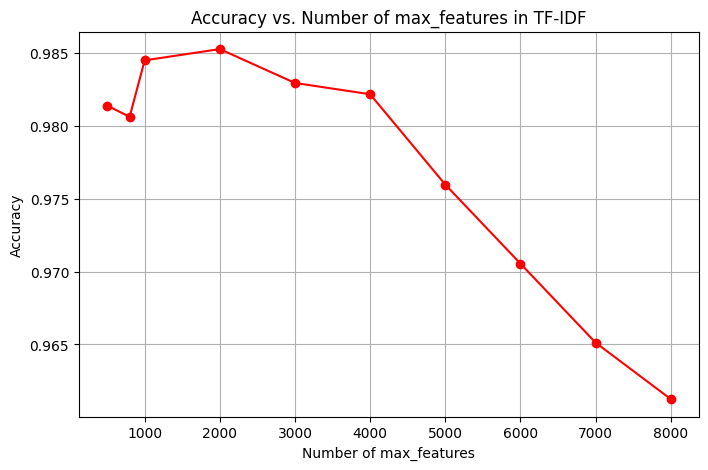

In [51]:
plt.figure(figsize=(8, 5))
plt.plot(feature_list, accuracy_list, marker='o', linestyle='-', color='r', label="Accuracy")

plt.xlabel("Number of max_features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of max_features in TF-IDF")
plt.grid(True)

plt.show()


In [52]:
tfidf = TfidfVectorizer(max_features=best_feature)
X = tfidf.fit_transform(df['Message'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.1f} %")

Accuracy: 98.1 %


# Now train the model on complete data

In [54]:
model.fit(X,y)

MultinomialNB()

In [55]:
import joblib
joblib.dump(model, "Spam_Emails_Classifier.pkl")

['Spam_Emails_Classifier.pkl']

## Let's test our model manually


In [56]:
# Example 1
new_text = ["Hi Ali Zain, I was testing your model and found that it is accurate in its predictions."]
new_text_transformed = tfidf.transform(new_text)

prediction = model.predict(new_text_transformed)
print(prediction)

['ham']


In [57]:
# Example 2
new_text = [""""Had your contract mobile 11 Months? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records."""]
new_text_transformed = tfidf.transform(new_text)

prediction = model.predict(new_text_transformed)
print(prediction)

['spam']
